## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [2]:
import pandas as pd

In [8]:
SELECTED_COUNTRIES = ["USA", "GBR", "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
df_patents = pd.read_csv("data/out/wipo_patents.csv")
df_clio1 = pd.read_csv("data/out/all_clio_data_pt1.csv")
df_clio2 = pd.read_csv("data/out/all_clio_data_pt2.csv")

df_clio1 = df_clio1.loc[:, ~df_clio1.columns.str.contains('^Unnamed')]
df_clio2 = df_clio2.loc[:, ~df_clio2.columns.str.contains('^Unnamed')]

merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_clio1, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_clio2, on=["YEAR", "COUNTRYCODE"], how="outer")

# merged_df.fillna(0, inplace=True)
merged_df.head()

,COUNTRYCODE,YEAR,TERTIARYCOMPLETIONRATE,EDUCATIONGDPSHARE,NOBELLAUREATES,PATENTFILINGS,ARMEDCONFLICTSINTERNAL,ARMEDCONFLICTSINTERNATIONAL,AVERAGEYEARSOFEDUCATION_x,BOOKTITLESPERCAPITA,...,COMPOSITEMEASUREOFWELLBEING,EXECUTIVECONSTRAINTSXCONST,HOMICIDERATES,INCOMEINEQUALITY,INFLATIONAFG,15000.0,0.0,AVERAGEYEARSOFEDUCATION_y,TOTALPOPULATION,UNIVERSITIESFOUNDED
0,AFG,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN
1,AGO,1500,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,1500,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN
3,AND,1500,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,1500,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1200x600 with 0 Axes>

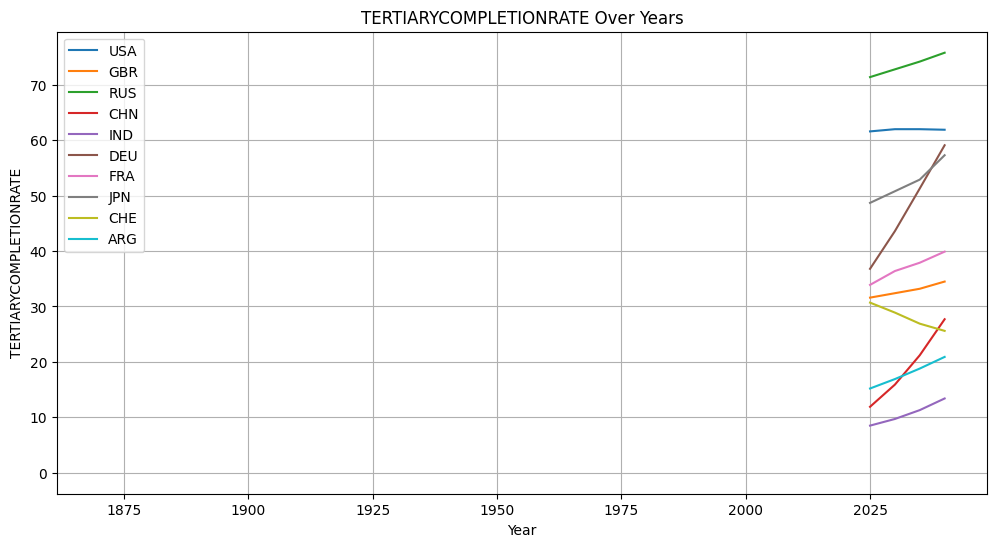

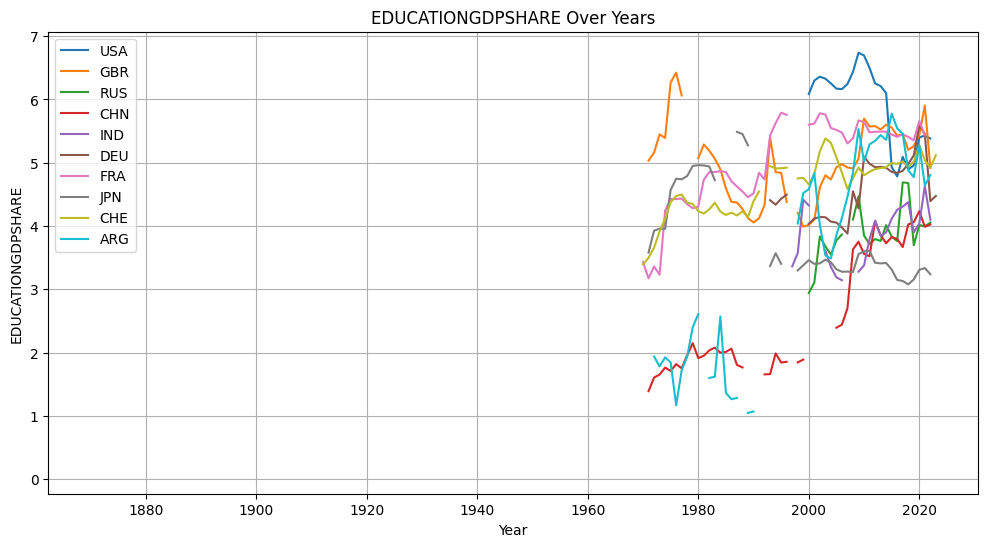

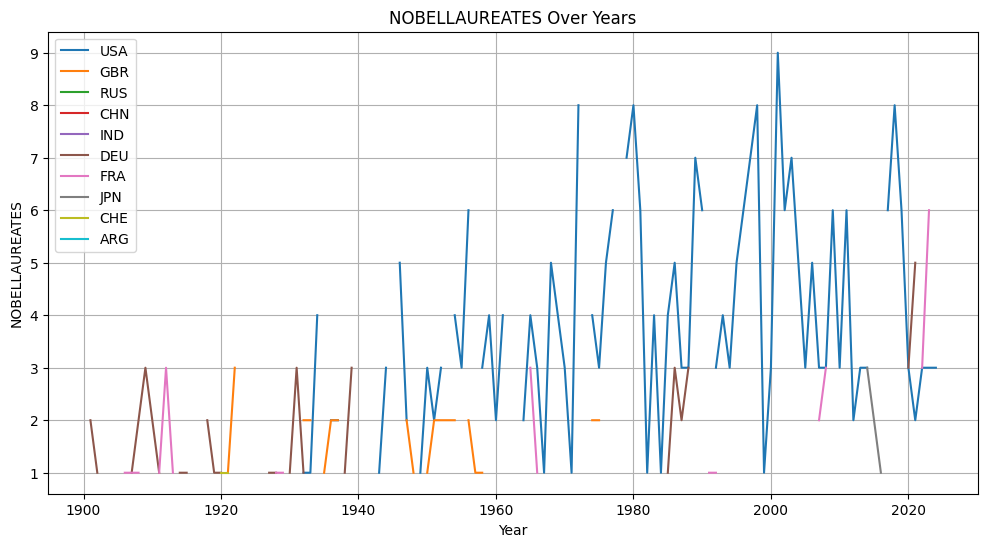

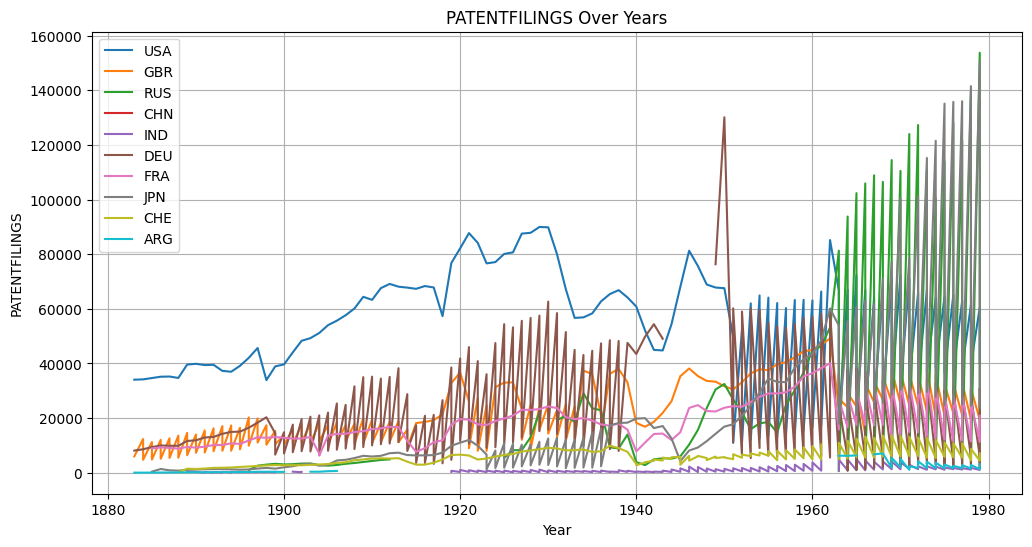

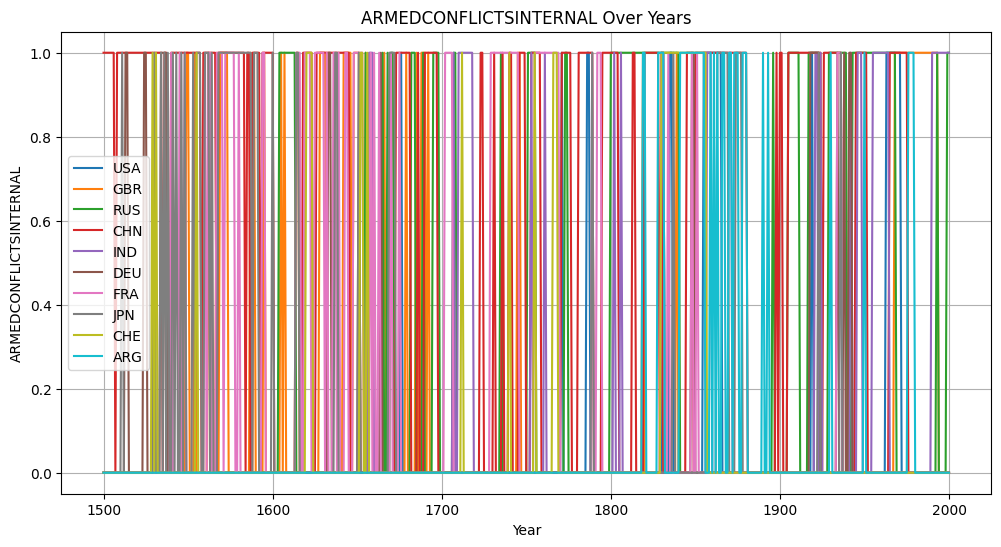

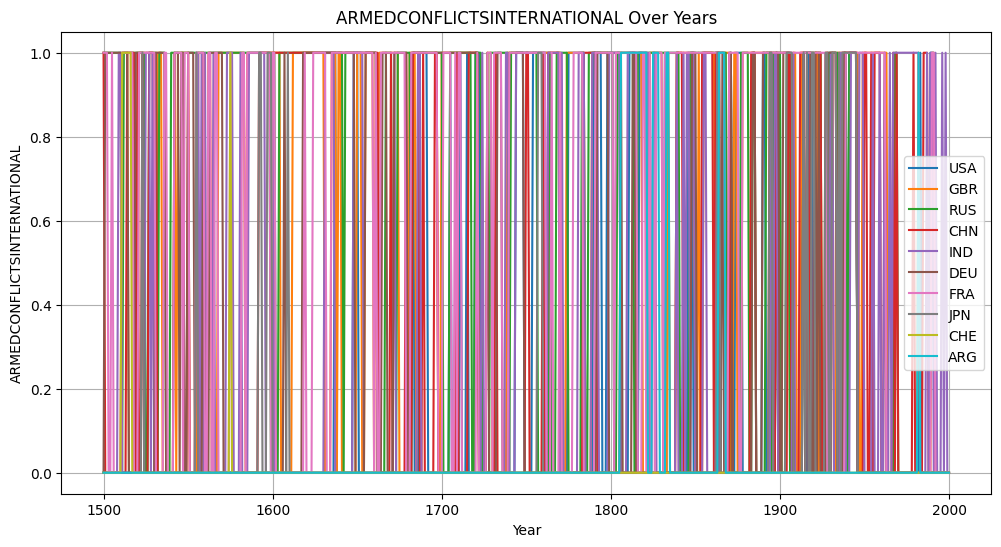

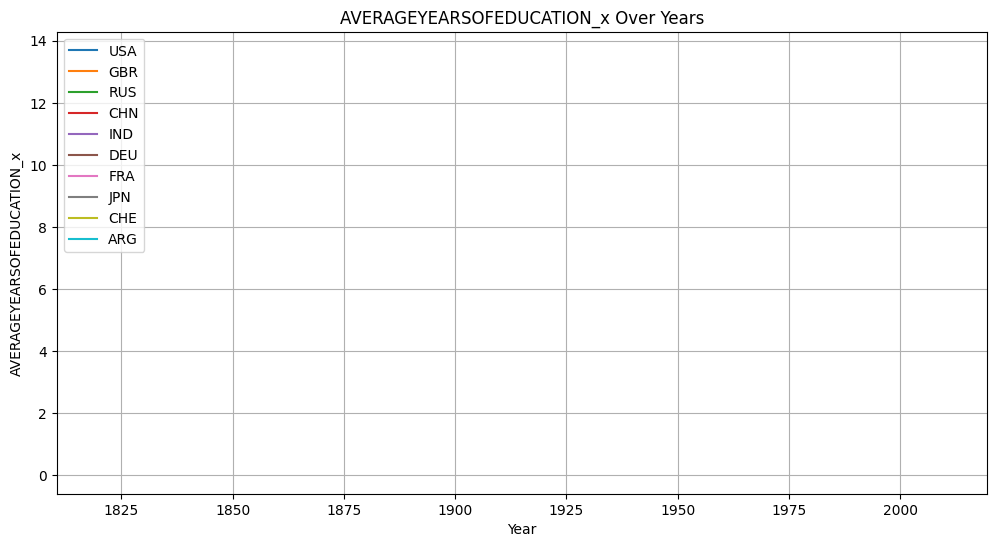

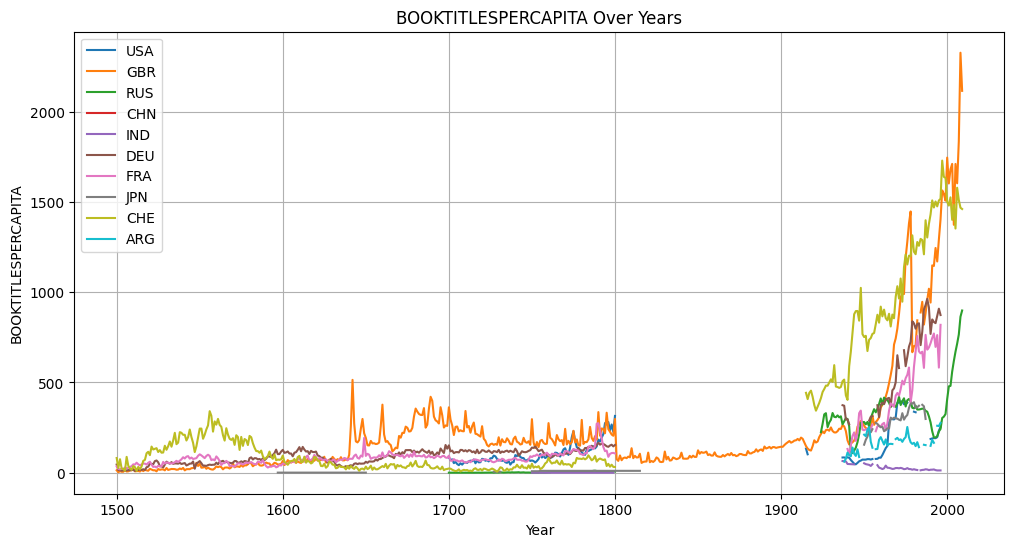

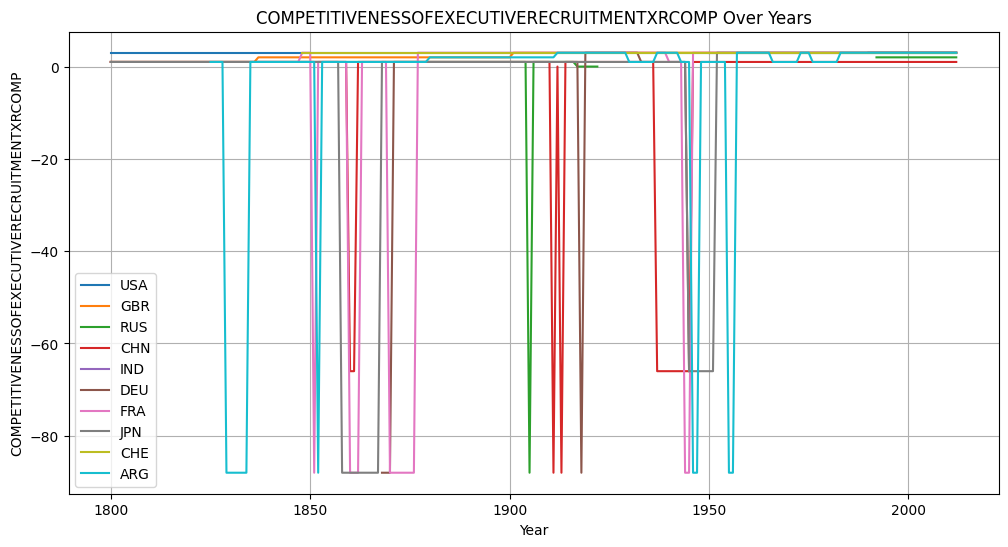

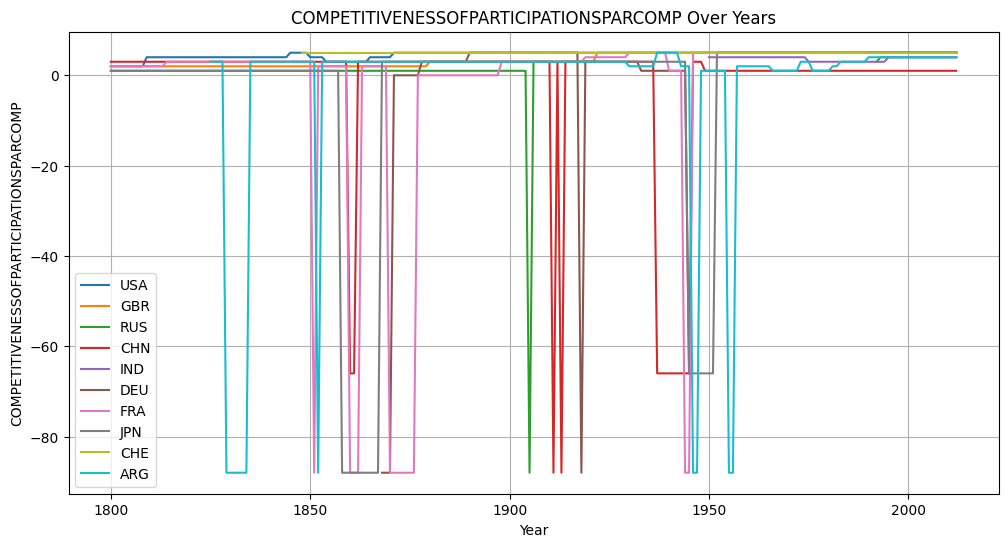

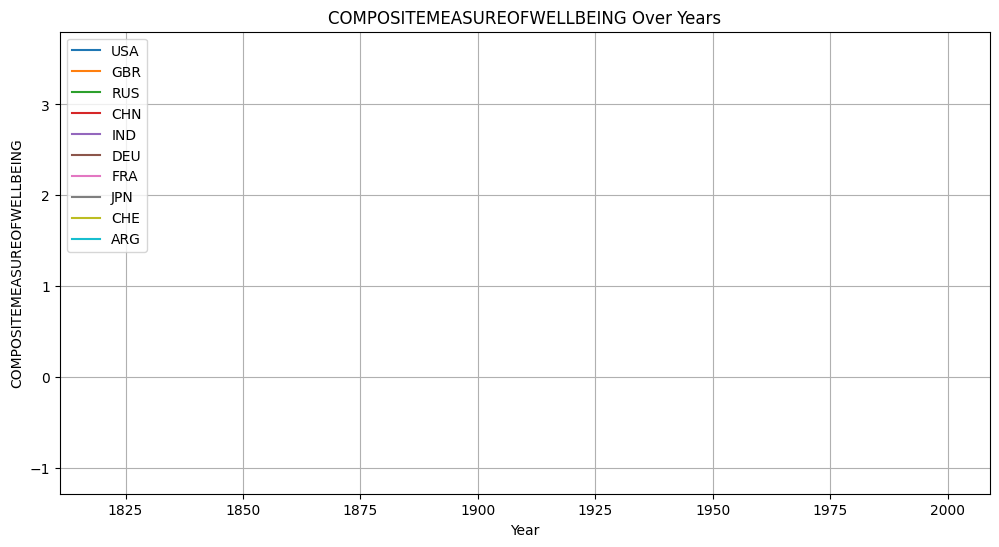

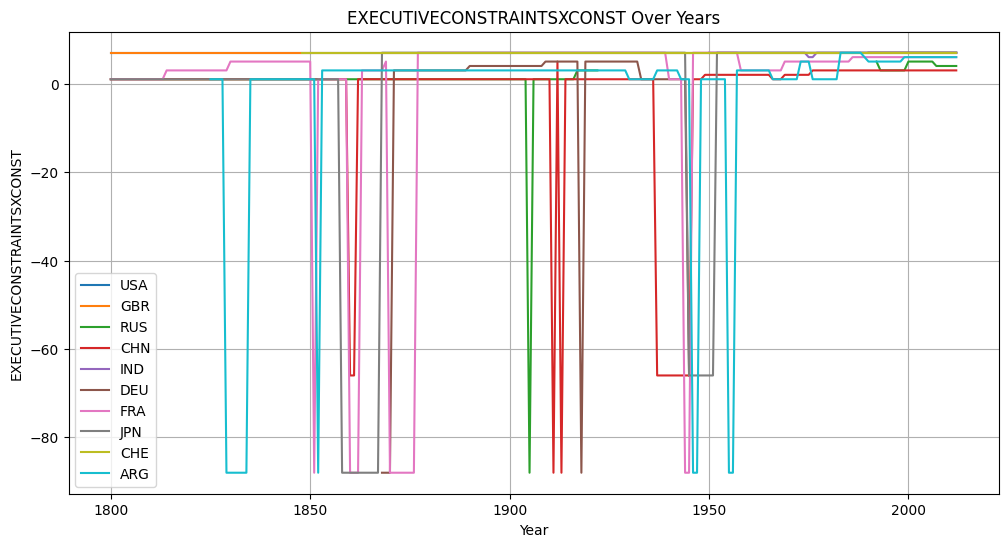

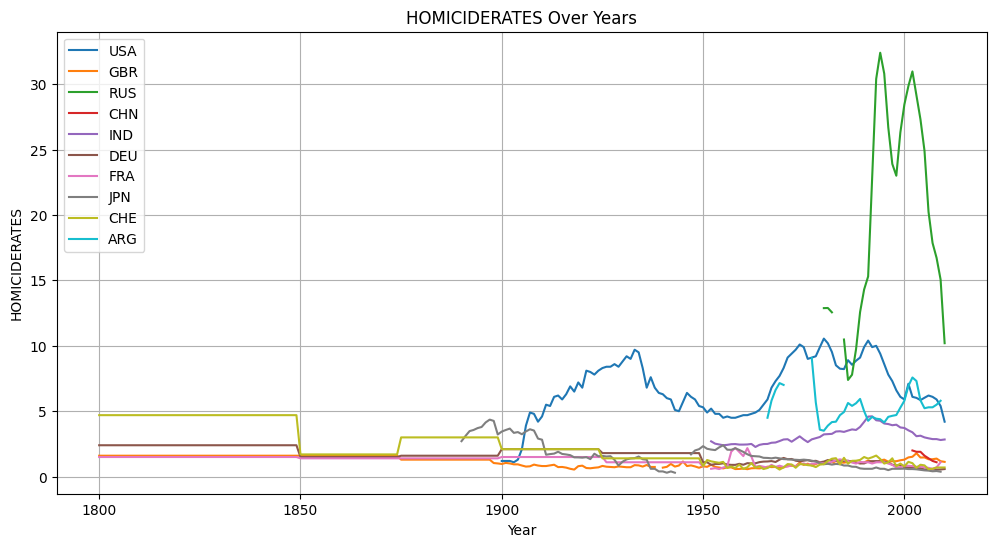

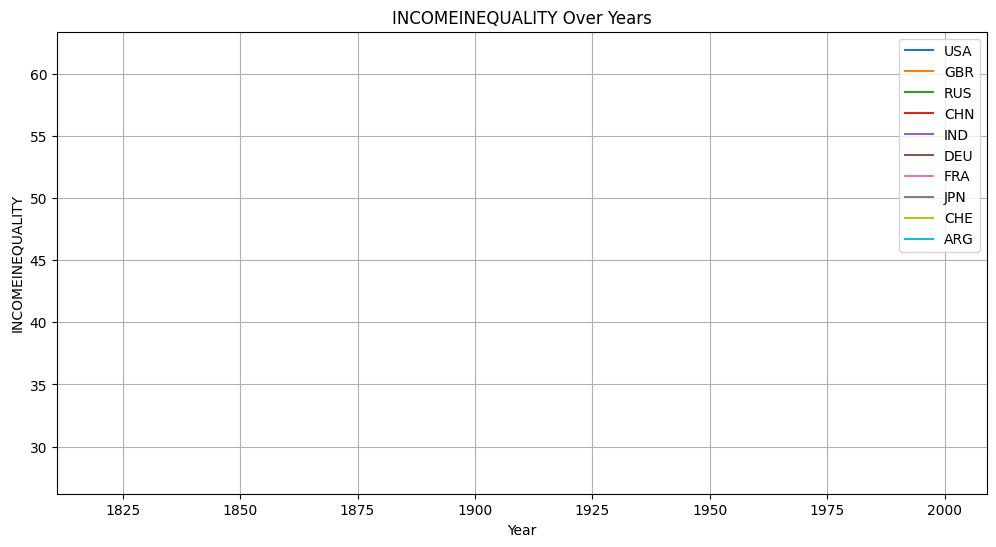

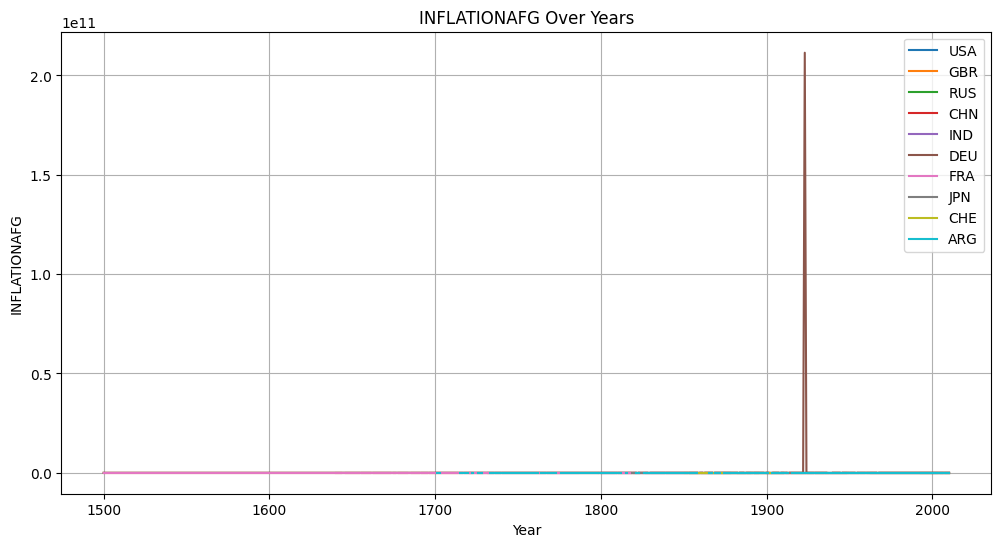

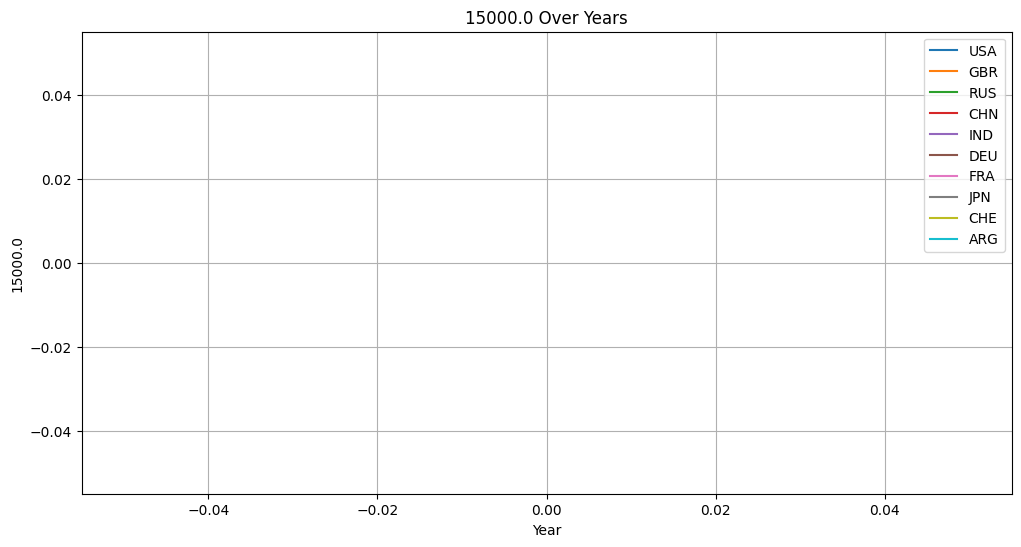

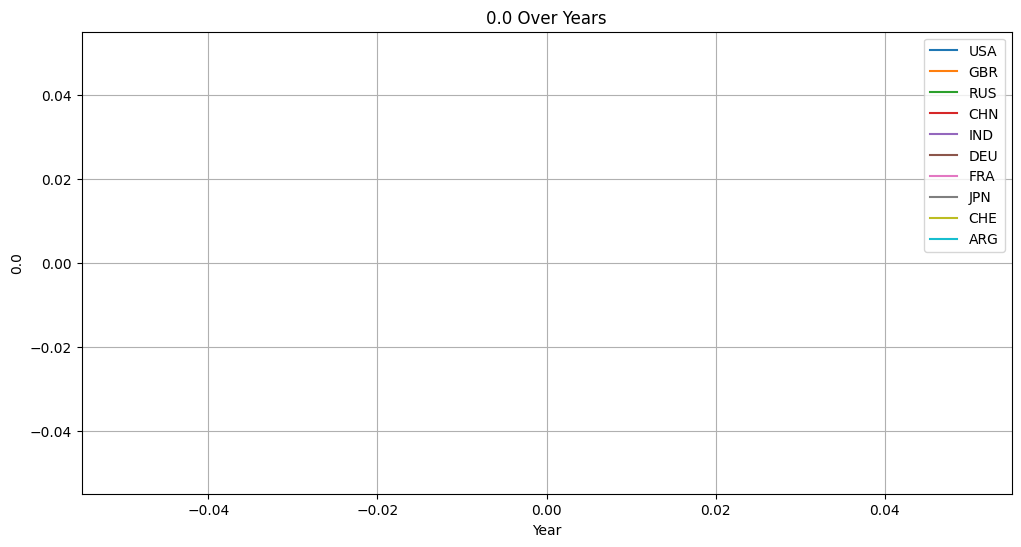

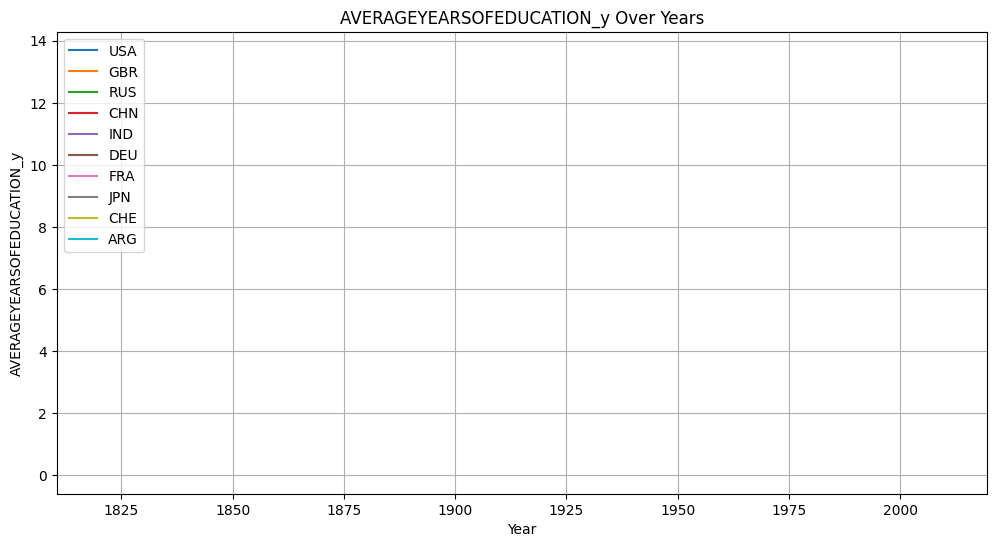

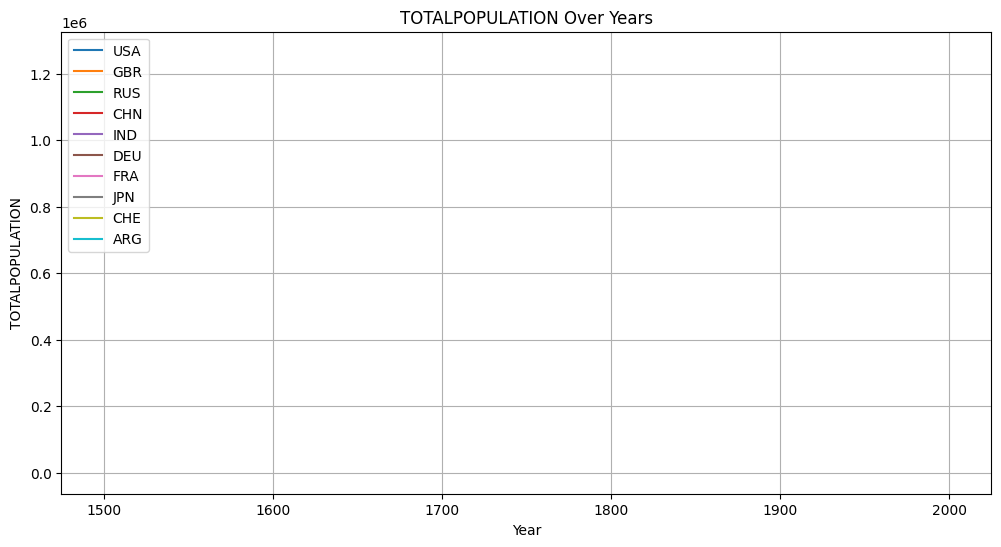

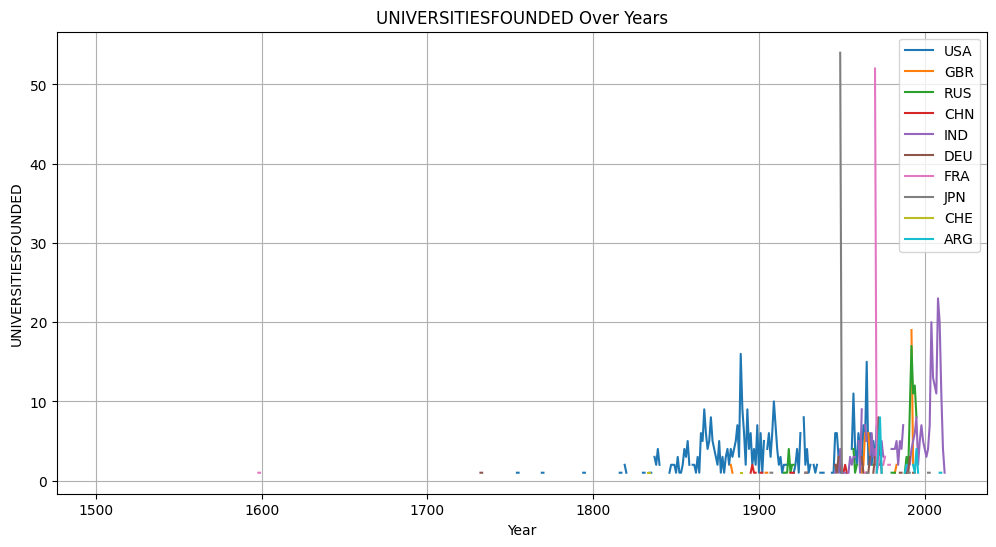

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in merged_df.columns:
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country]
            plt.plot(country_data['YEAR'], country_data[column], label=country)
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()
